In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import pi, power, sqrt, sin, cos, linalg
from scipy.special import gamma, binom, eval_jacobi
import sympy.physics.quantum as qt
import scipy.constants as sc

In [11]:
#Construção dos operadores L+ L- Ly

j=200
l = int(2*j + 1 )

def Lp(l):
    F=np.zeros((l,l))
    for n in range(0,l):
        for m in range(0,l):
            if m >= n:
                F[m,n]= 0
            if n-m!=1:
                F[m,n]= 0
            else:
                u = m-j
                F[m,n] = np.sqrt(j*(j+1) - u*(u+1))
    return F 
#print(Lp(l))

def Lm(l):
    F=np.zeros((l,l))
    for n in range(0,l):
        for m in range(0,l):
            if n >= m:
                F[m,n]= 0
            if m-n!=1:
                F[m,n]= 0
            else:
                u = m-j
                F[m,n] = np.sqrt(j*(j+1) - u*(u-1))
    return F 
#print(Lm(l))

def Ly(l):
    F=np.zeros((l,l))
    F= -1j*(Lp(l) - Lm(l))/2
    return F
print(Ly(l))

def Lx(l):
    F=np.zeros((l,l))
    F= (Lp(l) + Lm(l))/2
    return F
print(Lx(l))

def Lz(l):
    F=np.zeros((l,l))
    for n in range(0,l):
        for m in range(0,l):
            if m == n:
                u = m-j
                F[m,n] = -u
            else:
                F[m,n] = 0
    return F
print(Lz(l))

#print(np.dot(Ly(l),Lz(l)) + np.dot(Lz(l),Ly(l)))
#print(np.dot(Ly(l),Lx(l)) + np.dot(Lx(l),Ly(l)))


[[0. -0.j         0.-10.03742995j 0. -0.j         ... 0. -0.j
  0. -0.j         0. -0.j        ]
 [0.+10.03742995j 0. -0.j         0.-14.17744688j ... 0. -0.j
  0. -0.j         0. -0.j        ]
 [0. -0.j         0.+14.17744688j 0. -0.j         ... 0. -0.j
  0. -0.j         0. -0.j        ]
 ...
 [0. -0.j         0. -0.j         0. -0.j         ... 0. -0.j
  0.-14.17744688j 0. -0.j        ]
 [0. -0.j         0. -0.j         0. -0.j         ... 0.+14.17744688j
  0. -0.j         0.-10.03742995j]
 [0. -0.j         0. -0.j         0. -0.j         ... 0. -0.j
  0.+10.03742995j 0. -0.j        ]]
[[ 0.         10.03742995  0.         ...  0.          0.
   0.        ]
 [10.03742995  0.         14.17744688 ...  0.          0.
   0.        ]
 [ 0.         14.17744688  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.         14.17744688
   0.        ]
 [ 0.          0.          0.         ... 14.17744688  0.
  10.03742995]
 [ 0.          0.         

Aqui eu construí um operador Floquet da simetria ortogonal, por base da "complex conjugation" para a covariância do operador. Ele é, primeiramente, dado por 

$F= \exp[{-ipL_{y}}]\exp[{-i\frac{k}{l}(L_{y}L_{x} + L_{x}L_{y})}]\exp[{-i\frac{k}{l}(L_{y}L_{z} + L_{z}L_{y})}]$

Porém algumas observações são interessantes:

Se os termos exponenciais mistos tiverem o kick retirado para o angulo p temos a distribuição unitária representada. Ou se o kick vai para o termo de y e um misto sem kick, também.

$F= \exp[{-ipL_{y}}]\exp[{-i\frac{p}{l}(L_{y}L_{x} + L_{x}L_{y})}]\exp[{-i\frac{k}{l}(L_{y}L_{z} + L_{z}L_{y})}]$

ou

$F= \exp[{-ipL_{y}}]\exp[{-i\frac{k}{l}(L_{y}L_{x} + L_{x}L_{y})}]\exp[{-ip(L_{y}L_{z} + L_{z}L_{y})}]$

ou

$F= \exp[{-ikL_{y}}]\exp[{-i\frac{k}{l}(L_{y}L_{x} + L_{x}L_{y})}]\exp[{-ip(L_{y}L_{z} + L_{z}L_{y})}]$

ou

$F= \exp[{-ikL_{y}}]\exp[{-ip(L_{y}L_{x} + L_{x}L_{y})}]\exp[{-i\frac{k}{l}(L_{y}L_{z} + L_{z}L_{y})}]$

Se apenas o termo de y tem kick temos a distribuição de poisson.

$F= \exp[{-ikL_{y}}]\exp[{-ip(L_{y}L_{x} + L_{x}L_{y})}]\exp[{-ip(L_{y}L_{z} + L_{z}L_{y})}]$


Um dos termos mistos pode ser retirado, porém acho que a preseça dos dois melhora o resultado. Porém pelo menos um estar no operador é necessário. E se um termo misto for substituido por um de $L_{z}^{2}$ temos a distribuição unitaria

$F= \exp[{-ipL_{y}}]\exp[{-i\frac{k}{l}(L_{z}^2)}]\exp[{-i\frac{k}{l}(L_{y}L_{z} + L_{z}L_{y})}]$

ou

$F= \exp[{-ipL_{y}}]\exp[{-i\frac{k}{l}(L_{y}L_{x} + L_{x}L_{y})}]\exp[{-i\frac{k}{l}(L_{z}^2)}]$

Tratando quaisquer um dos termos mistos, se eu faço algum deles identidade, eu continuo a ter distribuição ortogonal, se eu uso ambos com o mesmo valor de kick, k, mantenho ortogonal. Porém, se eu faço o termo de kick de qualquer um deles ficar no intervalo $0<x<k$ então eu tenho distribuição unitária.

$F= \exp[{-ikL_{y}}]\exp[{-i\frac{p}{l}(L_{y}L_{x} + L_{x}L_{y})}]\exp[{-i\frac{0.5*k}{l}(L_{y}L_{z} + L_{z}L_{y})}]$, por exemplo


In [12]:
#Floquet Ortogonal ?


#parte diagonal

k=100
p=1.7

#Se os termos mistos tiverem o kick retirado para o angulo p temos a distribuição unitária final. 
#Se o kick vai para o termo de y e um misto sem kick, também. Se apenas o termo de y tem kick, poisson.

#esse é vital
def oyFloq(k,j,p):
    A=np.zeros((l,l))+1j*np.zeros((l,l))
    A=scipy.linalg.expm(-1j*(p)*Ly(l))
    return A 
print('oyFloq(k,j,p)=')
print(oyFloq(k,j,p))

#####################

#pelo menos um dos mistos é vital e inserir um kick Lz2 no lugar de um deles leva para Unitary

#se eu boto o termo para I, tenho ORT, se boto o termo com kick k, ORT, um valor entre, UNIT

def oxyFloq(k,j,p):
    C=np.zeros((l,l))+1j*np.zeros((l,l))
    C = scipy.linalg.expm(-1j*(k/l)*(np.dot(Ly(l),Lx(l)) + np.dot(Lx(l),Ly(l)))) 
    return C
print('oxyFloq=')
print(oxyFloq(k,j,p))

def oyzFloq(k,j,p):
    O=np.zeros((l,l))+1j*np.zeros((l,l))
    O=np.eye(l)
    O=scipy.linalg.expm(-1j*(k/l)*(np.dot(Ly(l),Lz(l)) + np.dot(Lz(l),Ly(l)))) 
    return O
print('oyzFloq=')
print(oyzFloq(k,j,p))

##############################

def poFloq(k,j,p):
    G=np.zeros((l,l))+1j*np.zeros((l,l))
    G=np.dot(oyFloq(k,j,p),oxyFloq(k,j,p))
    return G

def oFloq(k,j,p):
    T=np.zeros((l,l))+1j*np.zeros((l,l))
    T=np.dot(poFloq(k,j,p),oyzFloq(k,j,p))
    return T
print('oFloq(k,j,p)=')
print(oFloq(k,j,p))


oyFloq(k,j,p)=
[[-7.58141623e-16+0.j  6.55782018e-16+0.j -1.05061519e-16+0.j ...
  -1.94958870e-48+0.j  1.56535984e-49+0.j -8.87627770e-51+0.j]
 [-6.61167183e-16+0.j -7.71102182e-16+0.j  6.80892604e-16+0.j ...
   3.39898887e-47+0.j -2.74483562e-48+0.j  1.56535984e-49+0.j]
 [ 3.59237301e-17+0.j -6.39656470e-16+0.j -6.10255374e-16+0.j ...
  -4.18478568e-46+0.j  3.39898887e-47+0.j -1.94958870e-48+0.j]
 ...
 [ 1.94958870e-48+0.j  3.39898887e-47+0.j  4.18478568e-46+0.j ...
  -4.33104313e-18+0.j -1.01833205e-16+0.j -6.15690485e-17+0.j]
 [ 1.56535984e-49+0.j  2.74483562e-48+0.j  3.39898887e-47+0.j ...
   1.14542038e-16+0.j  2.82835917e-16+0.j  1.34918343e-16+0.j]
 [ 8.87627770e-51+0.j  1.56535984e-49+0.j  1.94958870e-48+0.j ...
  -8.01814612e-17+0.j -1.32121872e-16+0.j  4.15295615e-16+0.j]]
oxyFloq=
[[ 0.38922547+0.j  0.        +0.j -0.31889655+0.j ...  0.        +0.j
   0.368295  +0.j  0.        +0.j]
 [ 0.        +0.j  0.14471737+0.j  0.        +0.j ... -0.20412645+0.j
   0.        +0.j  0.

In [13]:
def Floq_eigenvalues(k,j,p):
    ev= np.angle(np.linalg.eigvals(oFloq(k,j,p)))
    return np.sort(ev)
print(Floq_eigenvalues(k,j,p))

[-3.12884876 -3.12765964 -3.11618425 -3.09620261 -3.0632804  -3.05576739
 -3.02628634 -3.01435826 -3.01341592 -3.00107595 -2.986752   -2.96566251
 -2.95455465 -2.94550467 -2.92252113 -2.90406002 -2.89229139 -2.87198299
 -2.8619094  -2.84188635 -2.83553264 -2.82664034 -2.79805255 -2.79536084
 -2.78253822 -2.75936058 -2.73927356 -2.73821969 -2.72074715 -2.69901479
 -2.69039672 -2.67684073 -2.66467395 -2.65344044 -2.62572919 -2.60520024
 -2.58069882 -2.57480219 -2.54978942 -2.53775108 -2.51077779 -2.50915063
 -2.49164681 -2.4751067  -2.45440761 -2.44421142 -2.43654799 -2.4142532
 -2.39486511 -2.38162106 -2.35829827 -2.34761607 -2.32569093 -2.31831116
 -2.31211992 -2.29426883 -2.27929262 -2.27201671 -2.27143997 -2.21665335
 -2.20839175 -2.19340653 -2.15607675 -2.13711141 -2.11126344 -2.10552063
 -2.10262465 -2.08409543 -2.07306164 -2.04537675 -2.01860315 -2.01754434
 -2.0149609  -1.99473682 -1.9571735  -1.95207074 -1.9462556  -1.93167085
 -1.92584563 -1.91380633 -1.89753231 -1.8883253  -1.

In [14]:
def Floq_spacing(k,j,p):
    A=Floq_eigenvalues(k,j,p)
    return (2*j+1)/(2*np.pi)*np.abs(np.diff(A))

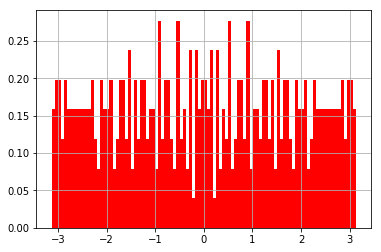

In [15]:
Floq_Eigen=Floq_eigenvalues(k,j,p)

plt.hist(Floq_Eigen.flatten(),100,density=1,color='red')

plt.grid(True)
plt.show()
#print(Floq_eigenvalues(k,j,p))

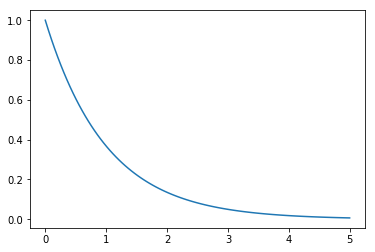

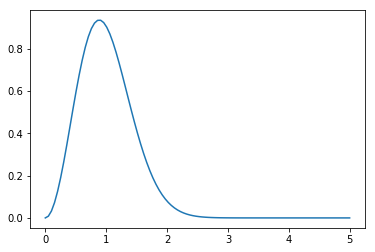

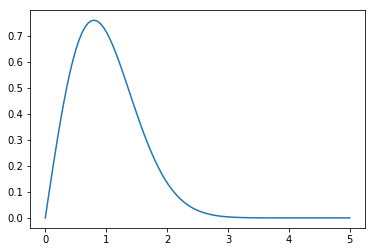

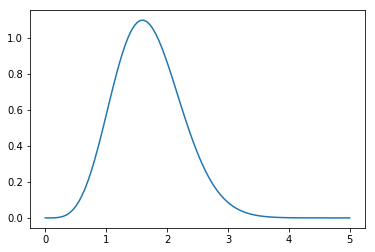

In [16]:
x = np.linspace(0,5,100)

#Poisson
def Poisson(x):
    return np.exp(-x)

vec_P=np.vectorize(Poisson)

plt.plot(x,vec_P(x))
plt.show()
#Unitary
def Unitary(x):
    return ((32*x**2)/(np.pi**2))*np.exp((-4*x**2)/np.pi)

vec_U=np.vectorize(Unitary)

plt.plot(x,vec_U(x))
plt.show()
#Orthogonal
def Orthogonal(x):
    return ((np.pi*x)/(2))*np.exp((-np.pi*x**2)/(4))

vec_O=np.vectorize(Orthogonal)

plt.plot(x,vec_O(x))
plt.show()

def Sympletic(x):
    return ((np.pi*x**4)/(sqrt(2*np.pi)))*np.exp((-np.pi*x**2)/(4))

vec_S=np.vectorize(Sympletic)

plt.plot(x,vec_S(x))
plt.show()

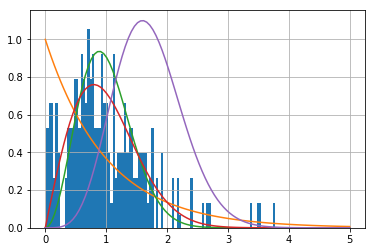

In [17]:
#n, bins, patches =
plt.hist(Floq_spacing(k,j,p).flatten(),100, density=1)
plt.plot(x, vec_P(x))
plt.plot(x, vec_U(x))
plt.plot(x, vec_O(x))
plt.plot(x, vec_S(x))

plt.grid(True)
plt.show()

In [18]:
#Ensambles

def Floq_Ensemble(M,k,l,p):
    Ensemble=np.zeros((M,l-1))
    for i in range(M):
        Ensemble[i,:]=Floq_spacing(k+i*Step,j,p)
    return Ensemble

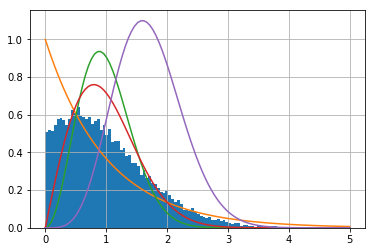

In [19]:
M=100
Step=0.01
A=Floq_Ensemble(M,k,l,p).flatten()

plt.hist(A, 100, density=1)

plt.plot(x, vec_P(x))
plt.plot(x, vec_U(x))
plt.plot(x, vec_O(x))
plt.plot(x, vec_S(x))

plt.grid(True)
plt.show()